# Machine Learning Assignment No: 3 (Classification).

# Name: Khuram Shahzad, Roll No: p218742

# Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.model_selection import KFold
from statistics import mean, stdev
from sklearn import datasets
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing the Data

In [2]:
def load_data():
    '''
    Loading the data for this file into a pandas DataFrame.
    '''
    xls = pd.ExcelFile('adultData.xlsx')
    dftraining = pd.read_excel(xls, 'training')
    dftesting = pd.read_excel(xls, 'testing')
#     table = pd.read_excel(xls, 'table')
    # Return the entire frame
    return dftraining, dftesting

# Data Preprocessing

n

In [3]:
def DataPreprocessing(dataFrame):
    df = dataFrame.drop(['workclass','income','education','marital-status','occupation','relationship','race','sex','native-country'], axis =1)
    target = df['income_target']
    training = df.copy()
    
    training = training.drop('income_target', axis =1)
    # Defining the attributes
    X = np.delete(training.to_numpy(), (0), axis=0) 
    y = np.delete(target.to_numpy(), (0), axis=0) 
    y=y.astype(int)
    return X, y

# Training and Testing

Stratified 5-Fold cross-validation (the dataset is imbalanced)

In [25]:
def ApplyClassifier(model, train_X, train_y, test_X, test_y):
    
    model_name = type(model).__name__
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    model_accu_stratified = []
    cv_score =[]
    i=1
    
    print('-----------------------------------------------------------------------------------------')
    print('Classifier Name: ', model_name)
    print('-----------------------------------------------------------------------------------------')
      
        # summarize train and test composition
    train_1, train_2 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_1, test_2 = len(test_y[test_y==0]), len(test_y[test_y==1])

    print('           >Train: <=50k =%d, >50k =%d, Test:  <=50k =%d, >50k =%d' % (train_1, train_2, test_1, test_2))
    model.fit(train_X, train_y)
#     try:
    score = roc_auc_score(test_y, model.predict(test_X))
#     except ValueError:
#     pass
    
    print('           ROC AUC score:',score)
    cv_score.append(score)
    model_accu_stratified.append(model.score(test_X, test_y))    
    print('-----------------------------------------------------------------------------------------')
#     call to evaluations
    Evaluation(model, model_accu_stratified,cv_score,test_X, test_y, model_name )

# Evaluation

In [28]:
def Evaluation(model, model_accu_stratified,cv_score, test_X, test_y, classifireName):

    print('Possible accuracy are :',(round(model_accu_stratified[0], 5)) )
    print('\nMaximum Accuracy That can be obtained from this model is:',
          max(model_accu_stratified)*100, '%')
    print('\nMinimum Accuracy:',
          min(model_accu_stratified)*100, '%')
    print('\nOverall(Mean) Accuracy:',
          mean(model_accu_stratified)*100, '%')
#     print('\nStandard Deviation is:', stdev(model_accu_stratified))
    print('-----------------------------------------------------------------------------------------')
    print('Cv: ',cv_score,'\nMean cv Score :',np.mean(cv_score))
    print('-----------------------------------------------------------------------------------------')
    print("\n            Confusion Matrix on tested data\n")
    
    
    cm =confusion_matrix(test_y,model.predict(test_X))
    print('-----------------------------------------------------------------------------------------')
    tp, fn, fp, tn =confusion_matrix(test_y,model.predict(test_X)).reshape(-1)

    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(test_y, model.predict(test_X))
    print('Classification report : \n',matrix)
    print('-----------------------------------------------------------------------------------------')

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score is  {0} of {1}'.format(round(np.mean(cv_score),2), classifireName )
    plt.title(all_sample_title, size = 15);

# ---------------------------------------Driver Class----------------------------------

In [20]:
# read data
df1, df2= load_data()
#ExploratoryDataAnalysis(0)

In [29]:
# DataPreprocessing
train_X, train_y =DataPreprocessing(df1)
test_X, test_y =DataPreprocessing(df2)

In [ ]:
len(np.array)

# 1. Decision Tree Classifier

-----------------------------------------------------------------------------------------
Classifier Name:  DecisionTreeClassifier
-----------------------------------------------------------------------------------------
           >Train: <=50k =24719, >50k =7841, Test:  <=50k =12434, >50k =3846
           ROC AUC score: 0.6918850825128388
-----------------------------------------------------------------------------------------
Possible accuracy are : 0.76732

Maximum Accuracy That can be obtained from this model is: 76.73218673218673 %

Minimum Accuracy: 76.73218673218673 %

Overall(Mean) Accuracy: 76.73218673218673 %
-----------------------------------------------------------------------------------------
Cv:  [0.6918850825128388] 
Mean cv Score : 0.6918850825128388
-----------------------------------------------------------------------------------------

            Confusion Matrix on tested data

------------------------------------------------------------------------------------

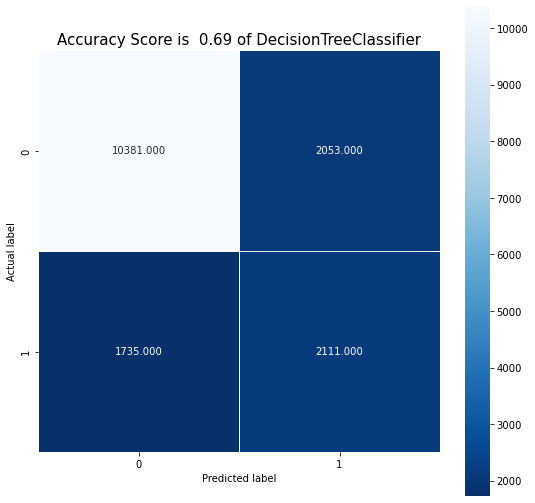

In [31]:
# Create  classifier object.
dtree = DecisionTreeClassifier()
ApplyClassifier(dtree, train_X, train_y, test_X, test_y)

Visualizing the decision tree

In [ ]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns,
                     class_names =["1", "2"] , filled = True , precision = 3, rounded = True)

# 2. KNeighbors Classifier

-----------------------------------------------------------------------------------------
Classifier Name:  KNeighborsClassifier
-----------------------------------------------------------------------------------------
           >Train: <=50k =24719, >50k =7841, Test:  <=50k =12434, >50k =3846
           ROC AUC score: 0.6020950054666173
-----------------------------------------------------------------------------------------
Possible accuracy are : 0.80614

Maximum Accuracy That can be obtained from this model is: 80.61425061425062 %

Minimum Accuracy: 80.61425061425062 %

Overall(Mean) Accuracy: 80.61425061425062 %
-----------------------------------------------------------------------------------------
Cv:  [0.6020950054666173] 
Mean cv Score : 0.6020950054666173
-----------------------------------------------------------------------------------------

            Confusion Matrix on tested data

--------------------------------------------------------------------------------------

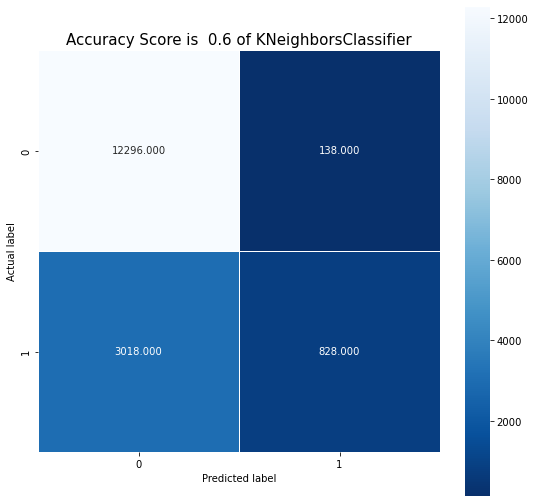

In [32]:
# Create  classifier object.
k = KNeighborsClassifier()
ApplyClassifier(k, train_X, train_y, test_X, test_y)

# 3. AdaBoostClassifier

-----------------------------------------------------------------------------------------
Classifier Name:  AdaBoostClassifier
-----------------------------------------------------------------------------------------
           >Train: <=50k =24719, >50k =7841, Test:  <=50k =12434, >50k =3846
           ROC AUC score: 0.6874762605109319
-----------------------------------------------------------------------------------------
Possible accuracy are : 0.83397

Maximum Accuracy That can be obtained from this model is: 83.39680589680589 %

Minimum Accuracy: 83.39680589680589 %

Overall(Mean) Accuracy: 83.39680589680589 %
-----------------------------------------------------------------------------------------
Cv:  [0.6874762605109319] 
Mean cv Score : 0.6874762605109319
-----------------------------------------------------------------------------------------

            Confusion Matrix on tested data

----------------------------------------------------------------------------------------

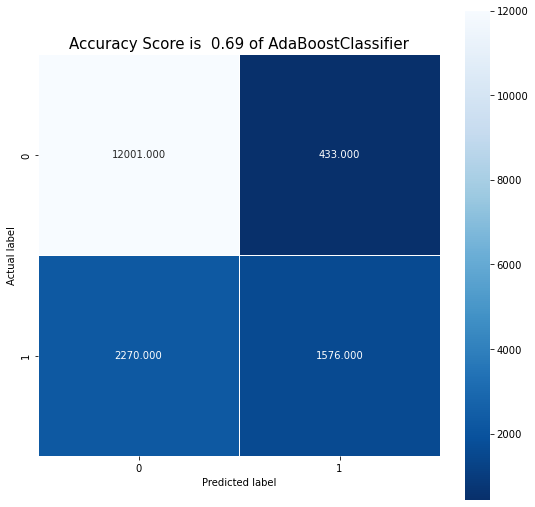

In [33]:
# Create  classifier object.
Ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R')
ApplyClassifier(Ada, train_X, train_y, test_X, test_y)

# 4. LogisticRegression

-----------------------------------------------------------------------------------------
Classifier Name:  LogisticRegression
-----------------------------------------------------------------------------------------
           >Train: <=50k =24719, >50k =7841, Test:  <=50k =12434, >50k =3846


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


           ROC AUC score: 0.5841668345839511
-----------------------------------------------------------------------------------------
Possible accuracy are : 0.80221

Maximum Accuracy That can be obtained from this model is: 80.22113022113022 %

Minimum Accuracy: 80.22113022113022 %

Overall(Mean) Accuracy: 80.22113022113022 %
-----------------------------------------------------------------------------------------
Cv:  [0.5841668345839511] 
Mean cv Score : 0.5841668345839511
-----------------------------------------------------------------------------------------

            Confusion Matrix on tested data

-----------------------------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     12434
           1       0.95      0.17      0.29      3846

    accuracy                           0.80     16280
   macro avg       0.88      0.58      0.59     

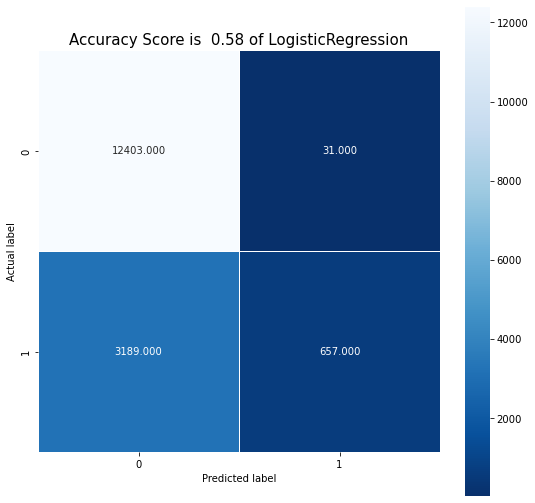

In [34]:
# Create  classifier object.
lr = LogisticRegression()
ApplyClassifier(lr, train_X, train_y, test_X, test_y)

# 5. Naive Bayes Classification

-----------------------------------------------------------------------------------------
Classifier Name:  GaussianNB
-----------------------------------------------------------------------------------------
           >Train: <=50k =24719, >50k =7841, Test:  <=50k =12434, >50k =3846
           ROC AUC score: 0.6266395774055186
-----------------------------------------------------------------------------------------
Possible accuracy are : 0.79631

Maximum Accuracy That can be obtained from this model is: 79.63144963144964 %

Minimum Accuracy: 79.63144963144964 %

Overall(Mean) Accuracy: 79.63144963144964 %
-----------------------------------------------------------------------------------------
Cv:  [0.6266395774055186] 
Mean cv Score : 0.6266395774055186
-----------------------------------------------------------------------------------------

            Confusion Matrix on tested data

-----------------------------------------------------------------------------------------
Classi

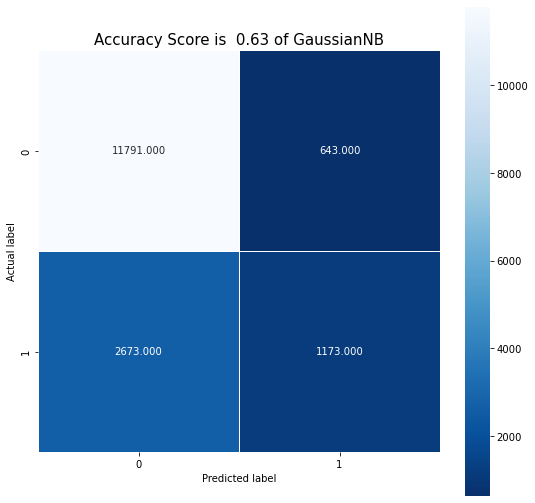

In [35]:
# Create  classifier object.
nBayes = GaussianNB()
ApplyClassifier(nBayes, train_X, train_y, test_X, test_y)